## <div style="text-align: center;"> Application of Machine Learning Tools for Credit Card Fraud Detection using Scikit-Learn and Snap ML (v 1.0)

### <div style="text-align: center;"> USING PYTHON PROGRAMMING LANGUAGE  </div>
Two popular Machine Learning classification models (Decision Tree and Support Vector Machine) are used to detect fraudulent credit card transactions. Models are trained using real dataset with 31 variables. The dataset includes information about transactions made by credit cards in September 2013 by European cardholders. The dataset has labeled fraud transactions (the target variable "Class" takes two values: 1 in case of fraud and 0 otherwise.). The aim is to train models to assess if a credit card transaction is legitimate or not.

This exercise is derived and developed within IBM Data Science Professional Certification on Coursera.
Prepared by Imir Osmanov. Date: 25.08.2024.

### <div style="text-align: center;"> EXECUTIVE SUMMARY </div>

### Purpose:
The purpose of this exercise is to apply two different Machine Learning models (Decision Tree and Support Vector Machine) and train them to detect fraudulent card transations using real dataset on credit card transactions.

### Main findings:
2 different Machine Learning models show the same score (ROC-AUC score : 0.966) on the test dataset. But Snap ML (training time (s):  2.54) runs the training routine 2.9x faster than Scikit-Learn (training time (s):  7.54). However, the quality of the trained models trained above using the hinge loss metric is the same (Hinge loss:   0.228).

### Methodology:
The methodology is based on application of 2 different Machine Learning models (Decision Tree and Support Vector Machine) to model the problem as a binary classification problem. To train the models the dataset on real credit card transactions made by European cardholders in September 2013 is used. If transaction belongs to fraud it is labeled as positive class (1), otherwise it belongs to the negative class (0). The majority of the transactions are normally legitimate and only a small fraction are non-legitimate. So, the dataset that is highly unbalanced: only 492 transactions out of 284,807 are fraudulent (the positive class - the frauds - accounts for 0.172% of all transactions).

In [2]:
# Importing required libraries
import numpy as np
import pandas as pd
import time
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from snapml import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from snapml import SupportVectorMachine
from sklearn.metrics import hinge_loss
!pip install snapml

In [3]:
# Downloading necessary files
filepath = 'C:/Users/user/Documents/Imir/IBM/Data/creditcard.csv'
creditcard_df = pd.read_csv(filepath)
print("There are " + str(len(creditcard_df)) + " observations in the credit card fraud dataset.")
print("There are " + str(len(creditcard_df.columns)) + " variables in the dataset.")
creditcard_df.head(5)

There are 284807 observations in the credit card fraud dataset.
There are 31 variables in the dataset.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Checking the last 10 rows of the dataset
creditcard_df.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
# Getting summary on dataframe
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Checking for null values
creditcard_df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In real life transactions can be much larger and to simulate such a case, we will inflate the original dataset one 10 times.

In [7]:
#inflation of the origianl dataset
n_replicas = 10
big_cc_df = pd.DataFrame(np.repeat(creditcard_df.values, n_replicas, axis = 0), columns = creditcard_df.columns)
print("There are " + str(len(big_cc_df)) + " observations in the inflated credit card fraud dataset.")
print("There are " + str(len(big_cc_df.columns)) + " variables in the credit card fraud dataset.")
big_cc_df.head()

There are 2848070 observations in the inflated credit card fraud dataset.
There are 31 variables in the credit card fraud dataset.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
2,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
3,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
4,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0


Visualization of the distribution of distinct classes in a dataset using a pie chart.

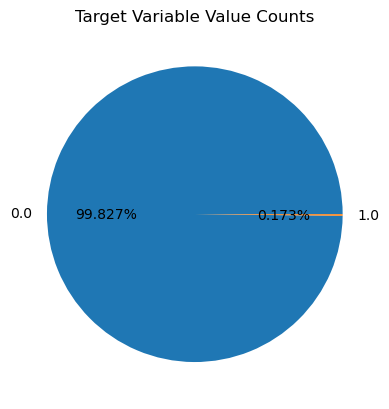

In [8]:
# Distribution of distinct classes in a dataset using a pie chart.
labels = big_cc_df.Class.unique()
sizes = big_cc_df.Class.value_counts().values
fig, ax = plt.subplots()
ax.pie(sizes, labels = labels, autopct = '%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()

Visualization of data distributions and understanding key statistical metrics using histogram.

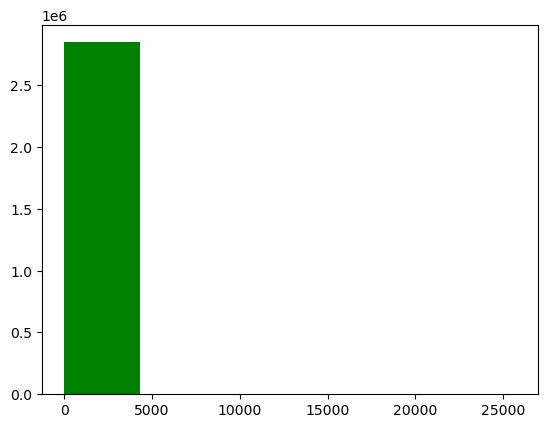

Minimum amount value is  0.0
Maximum amount values is  25691.16
90% of the transactions have the amount less or equal than  203.0


In [9]:
# Histogram of distribution of credit card transactions
plt.hist(big_cc_df.Amount.values, 6, histtype = 'bar', facecolor = 'g')
plt.show()

print("Minimum amount value is ", np.min(big_cc_df.Amount.values))
print("Maximum amount values is ", np.max(big_cc_df.Amount.values))
print("90% of the transactions have the amount less or equal than ", np.percentile(creditcard_df.Amount.values, 90))

#### Dataset preprocessing
Dataset preprocessing by standardizing features and normalizing the feature matrix.

In [10]:
# standardize features by removing the mean and scaling to unit variance
big_cc_df.iloc[:, 1:30] = StandardScaler().fit_transform(big_cc_df.iloc[:, 1:30])
data_matrix = big_cc_df.values
X = data_matrix[:, 1:30]
y = data_matrix[:, 30]

# data normalization
X = normalize(X, norm = "l1")

# print the shape of the features matrix and the labels vector
print("X.shape = ", X.shape, "y.shape", y.shape)

X.shape =  (2848070, 29) y.shape (2848070,)


#### Splitting Dataset into Train/Test
Splitting the pre-processed dataset into a subset to be used for training the model (the train set) and a subset to be used for evaluating the quality of the model (the test set).

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
print("X_train.shape = ", X_train.shape, "Y_train.shape", y_train.shape)
print("X_test.shape = ", X_test.shape, "Y_test.shape", y_test.shape)

X_train.shape =  (1993649, 29) Y_train.shape (1993649,)
X_test.shape =  (854421, 29) Y_test.shape (854421,)


#### Building a Decision Tree Classifier model with Scikit-Learn
Handling class imbalance in a dataset by computing sample weights and training a Decision Tree Classifier using Scikit-learn. By incorporating sample weights, the model can learn more effectively from minority classes, leading to improved predictive performance.

In [12]:
# Computing the sample weights to be used as input to the train routine
w_train = compute_sample_weight('balanced', y_train)
sklearn_dt = DecisionTreeClassifier(max_depth = 4, random_state = 35)
t0 = time.time()
# Training a Decision Tree Classifier using sc ikit-learn
sklearn_dt.fit(X_train, y_train, sample_weight = w_train)
sklearn_time = time.time()-t0
print("[Scikit-Learn] Training time (s) : {0:.5f}".format(sklearn_time))

[Scikit-Learn] Training time (s) : 7.59143


#### Building a Decision Tree Classifier model with Snap ML
Utilizing the Snap ML library to train a Decision Tree Classifier while addressing class imbalance through sample weights.

In [13]:
# Training a Decision Tree Classifier model using Snap ML
snapml_dt = DecisionTreeClassifier(max_depth = 4, random_state = 45, n_jobs = 4)
t0 = time.time()
snapml_dt.fit(X_train, y_train, sample_weight = w_train)
snapml_time = time.time()-t0
print("[Snap ML] Training time (s) : {0:.5f}".format(snapml_time))

[Snap ML] Training time (s) : 2.54106


In [29]:
# Snap ML vs Scikit-Learn training speedup
training_speedup = sklearn_time/snapml_time
print('[Decision Tree Classifier] Snap ML vs. Scikit-Learn speedup : {0:.2f}x '.format(training_speedup))


sklearn_pred = sklearn_dt.predict_proba(X_test)[:,1]

# Evaluating the Compute Area Under the Receiver Operating Characteristic 
# Curve (ROC-AUC) score from the predictions
sklearn_roc_auc = roc_auc_score(y_test, sklearn_pred)
print('[Scikit-Learn] ROC-AUC score : {0:.3f}'.format(sklearn_roc_auc))

# Running inference and compute the probabilities of the test samples
# to belong to the class of fraudulent transactions
snapml_pred = snapml_dt.predict_proba(X_test)[:,1]

# Evaluating the Compute Area Under the Receiver Operating Characteristic
# Curve (ROC-AUC) score from the prediction scores
snapml_roc_auc = roc_auc_score(y_test, snapml_pred)   
print('[Snap ML] ROC-AUC score : {0:.3f}'.format(snapml_roc_auc))

[Decision Tree Classifier] Snap ML vs. Scikit-Learn speedup : 9.76x 
[Scikit-Learn] ROC-AUC score : 0.966
[Snap ML] ROC-AUC score : 0.966


#### Evaluating the Scikit-Learn and Snap ML Decision Tree Classifier Model
Exploring the comparative training speedup between Snap ML and Scikit-Learn when utilizing a Decision Tree Classifier.

#### Building a Support Vector Machine model with Scikit-Learn
Implementing of a linear Support Vector Machine using the Scikit-Learn library.

In [14]:
# Instatiating a scikit-learn Support Vector Machine model
sklearn_svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)

# Training a linear Support Vector Machine model using Scikit-Learn
t0 = time.time()
sklearn_svm.fit(X_train, y_train)
sklearn_time = time.time() - t0
print("[Scikit-Learn] Training time (s):  {0:.2f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  55.22


#### Building a Support Vector Machine model with Snap ML
Using of Snap ML, a library that enhances the training of SVMs by leveraging multi-threading and GPU capabilities. 

In [15]:
# Training an SVM model using Snap ML
snapml_svm = SupportVectorMachine(class_weight='balanced', random_state=25, n_jobs=4, fit_intercept=False)

t0 = time.time()
model = snapml_svm.fit(X_train, y_train)
snapml_time = time.time() - t0
print("[Snap ML] Training time (s):  {0:.2f}".format(snapml_time))

[Snap ML] Training time (s):  6.31


#### Evaluating the Scikit-Learn and Snap ML Support Vector Machine Models
Comparing the training speed of Snap ML and Scikit-Learn when implementing Support Vector Machines (SVM).

In [16]:
# Computing the Snap ML vs Scikit-Learn training speedup
training_speedup = sklearn_time/snapml_time
print('[Support Vector Machine] Snap ML vs. Scikit-Learn training speedup : {0:.2f}x '.format(training_speedup))

sklearn_pred = sklearn_svm.decision_function(X_test)

# Evaluating accuracy on test set
acc_sklearn  = roc_auc_score(y_test, sklearn_pred)
print("[Scikit-Learn] ROC-AUC score:   {0:.3f}".format(acc_sklearn))

snapml_pred = snapml_svm.decision_function(X_test)

# Evaluating accuracy on test set
acc_snapml  = roc_auc_score(y_test, snapml_pred)
print("[Snap ML] ROC-AUC score:   {0:.3f}".format(acc_snapml))

[Support Vector Machine] Snap ML vs. Scikit-Learn training speedup : 8.76x 
[Scikit-Learn] ROC-AUC score:   0.984
[Snap ML] ROC-AUC score:   0.985


#### Evaluating the quality of the SVM models trained above using the hinge loss metric
Computing the hinge loss for predictions made by two different Support Vector Machine (SVM) implementations: Snap ML and Scikit-Learn.

In [17]:
# Getting the confidence scores for the test samples
sklearn_pred = sklearn_svm.decision_function(X_test)
snapml_pred  = snapml_svm.decision_function(X_test)

# Evaluating the hinge loss from the predictions
loss_snapml = hinge_loss(y_test, snapml_pred)
print("[Snap ML] Hinge loss:   {0:.3f}".format(loss_snapml))

# Evaluating the hinge loss metric from the predictions
loss_sklearn = hinge_loss(y_test, sklearn_pred)
print("[Scikit-Learn] Hinge loss:   {0:.3f}".format(loss_snapml))

[Snap ML] Hinge loss:   0.228
[Scikit-Learn] Hinge loss:   0.228


### Conclusion
2 different Machine Learning models  (Decision Tree and Support Vector Machine) show the same score (ROC-AUC score : 0.966) on the test dataset. But Snap ML (training time (s): 2.54) runs the training routine 2.9x faster than Scikit-Learn (training time (s): 7.54). Building a Support Vector Machine model with Scikit-Learn (training time (s):  55.22) and building a Support Vector Machine model with Snap ML (training time (s):  6.31).  Mowever, the quality of the trained models trained above using the hinge loss metric is the same (Hinge loss: 0.228).